# Exercise 2 - Python: Logistic Regression

## *Part One*: Logistic regression without regularization

Beginning with package imports, data loading, and initial visualization

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize  # Discovering optimal parameters
import matplotlib.pyplot as plt
import seaborn as sns

# For comparing answers
import statsmodels.discrete.discrete_model as sm  # Unregularized
from sklearn.linear_model import LogisticRegression  # Regularized

plt.style.use('ggplot')

%matplotlib inline

In [2]:
path = 'C:/Users/JeffM/Documents/Projects/Machine Learning/machine-learning-ex2/ex2/'

df = pd.read_csv(path+'ex2data1.txt', header=None, names=['Exam1Score', 'Exam2Score', 'Admitted'])

# Inserting additional column for the intercept
df['x0'] = 1

X = df[['x0', 'Exam1Score', 'Exam2Score']]
y = df['Admitted']

# An array of 0s for starting values of theta to be used in many functions
initialTheta = np.zeros(3)

df.head()

,Exam1Score,Exam2Score,Admitted,x0
0,34.623660,78.024693,0,1
1,30.286711,43.894998,0,1
2,35.847409,72.902198,0,1
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


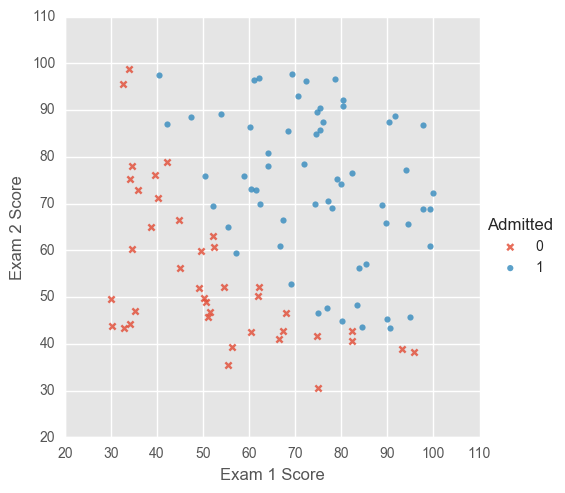

In [3]:
# Plotting the data
sns.lmplot(x='Exam1Score', y='Exam2Score', hue='Admitted',
            data=df, fit_reg=False, markers=["x", "o"])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

### Sigmoid Function

$g(z) = \frac{1}{1+e^{-z}}$

Converts $z$ into a value between 0 and 1

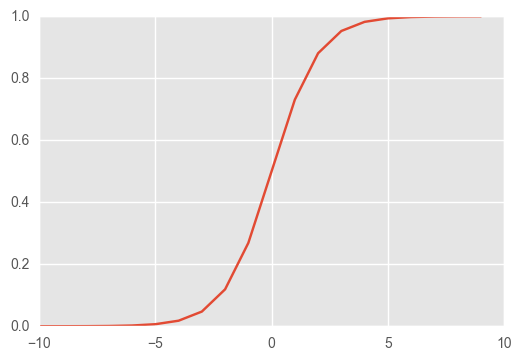

In [4]:
def sigmoid(z):
    """Converts numerical input into a value between 0 and 1"""
    return 1/(1+np.exp(-z))

# Plotting values to validate the function is working correctly
plt.plot(np.arange(-10, 10),
         sigmoid(np.arange(-10, 10)))

### Logistic Regression Hypothesis

$h_\theta(x) = g(\theta^Tx)$

- Notation:

    - $g$: Sigmoid function

    - $\theta^T$: Transposed parameters
       
        - E.x.: $\theta^T = \begin{bmatrix} \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix}$

In [5]:
def logistic_hypothesis(theta, x):
    """Calculates the hypothesis for X given values of
    theta for logistic regression"""
    return sigmoid(x.dot(theta))

logistic_hypothesis(theta=initialTheta, x=X.head())

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
dtype: float64

### Cost Function

$J(\theta) = \frac{1}{m} \sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))]$

- Notation:

    - $m$: Number of records

    - $h_\theta$: Logistic hypothesis $(h)$ given specific values of $\theta$ for parameters
    
    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)

In [6]:
def cost_function(theta, X, y):
    """Computes cost for logistic regression"""
    m = y.size
    h = logistic_hypothesis(theta, X)
    error = np.sum(-y*np.log(h)-(1-y)*np.log(1-h))
    J = (1/m)*error
    return J

cost_function(theta=initialTheta, X=X, y=y)

0.693147180559946

### Gradient

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

- Notation:

    - $\partial$: Partial derivative
    
    - $J(\theta)$: Cost given $\theta$

    - $m$: Number of records
    
    - $h_\theta$: Logistic hypothesis $(h)$ given specific values of $\theta$ for parameters
    
    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)
    
We won't actually be using this function to find the optimal values of $\theta_j$, so this is just illustrating the gradient

In [7]:
def gradient(theta, X, y):
    """Computes the gradient for logistic regression"""
    m = y.size
    h = logistic_hypothesis(theta, X)
    return (1/m)*(np.dot(X.values.T, (h.subtract(y, axis=0))))

gradient(theta=initialTheta, X=X, y=y)

array([ -0.1       , -12.00921659, -11.26284221])

Finding the optimal values of $\theta_j$ for the cost function using scipy's fmin function from their optimize suite.  This is similar to MATLAB's fminunc function.

In [8]:
# Find values of theta that minimize the cost function
optimalTheta = optimize.fmin(func=cost_function,  # Function to minimize
                             x0=initialTheta,  # Initial guess
                             args=(X, y))  # Additional Arguments

# Pretty printing the obtained values for theta
print('\nOptimal Thetas:')
for theta in enumerate(optimalTheta):
    print('Theta', theta[0], ':', theta[1])
    
print('\nCost:', cost_function(optimalTheta, X, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287

Optimal Thetas:
Theta 0 : -25.1613006236
Theta 1 : 0.206231420869
Theta 2 : 0.201471428635

Cost: 0.20349770159021519


Comparing the obtained parameters to what statsmodels provides

Using statsmodels instead of scikit-learn due to scikit-learn automatically regularizing the parameters.  Part one focuses on unregularized logistic regression, and part two focuses on regularized logistic regression.

In [9]:
# Training the model
model = sm.Logit(y, X)

# Outputting model parameters
model = model.fit().params
model

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


x0           -25.161334
Exam1Score     0.206232
Exam2Score     0.201472
dtype: float64

Those are very close!

Calculating the class probability and generating predictions of acceptance using values of $\theta_j$ obtained from the optimization function

The outputs from logistic regression are just the class probability, or $P(y = 1 \mid x; \theta)$, so we are predicting the classes (accepted or not) as follows:

$Prediction(y \mid x; \theta) = \begin{cases} 1, \quad\mbox{ if } P(y = 1 \mid x; \theta) > 0.50 \\ 0, \quad\mbox{ if } P(y = 1 \mid x; \theta) \leq 0.50 \end{cases} $

In [10]:
# Predicting the class probability with the obtained thetas
df['ClassProbability'] = logistic_hypothesis(optimalTheta, X)

# Assigning those with a class probability above 0.5 as admitted
df['Prediction'] = np.where(df['ClassProbability'] > 0.5, 1, 0)

df.head()

,Exam1Score,Exam2Score,Admitted,x0,ClassProbability,Prediction
0,34.623660,78.024693,0,1,0.091035,0
1,30.286711,43.894998,0,1,0.000042,0
2,35.847409,72.902198,0,1,0.043909,0
3,60.182599,86.308552,1,1,0.990425,1
4,79.032736,75.344376,1,1,0.998199,1


Plotting the decision boundary over the data

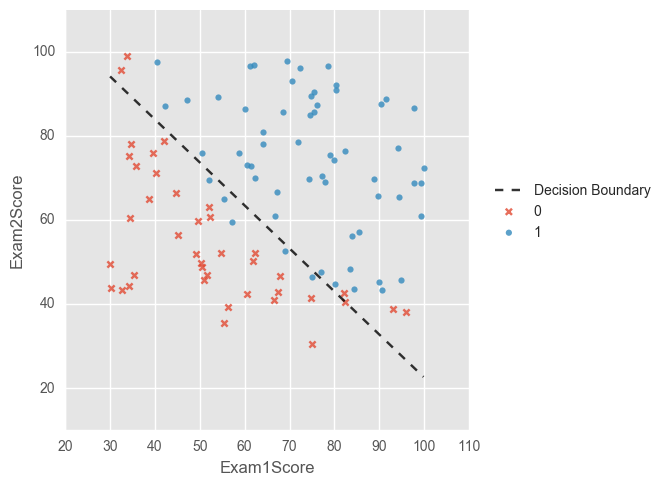

In [11]:
# Plotting the data
sns.lmplot(x='Exam1Score', y='Exam2Score', hue='Admitted',
            data=df, fit_reg=False, markers=["x", "o"], legend=False)

# Calculating and plotting the decision boundary
decisionX = np.array([X['Exam1Score'].min(), X['Exam1Score'].max()])
decisionY = (-1/optimalTheta[2])*(optimalTheta[0] + optimalTheta[1]*decisionX)
plt.plot(decisionX, decisionY, label='Decision Boundary',
         color='black', alpha=0.8, linestyle='--')

# Adjusting the legend location
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)

---

##  **Part 2:** Logistic regression with regularization

Predicting acceptance of microchips based off of two tests

In [12]:
df = pd.read_csv(path+'ex2data2.txt', header=None, names=['Test1', 'Test2', 'Accepted'])

df.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


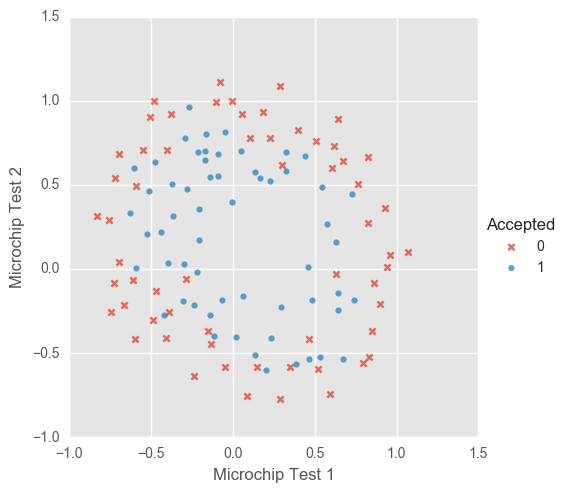

In [13]:
sns.lmplot(x='Test1', y='Test2', hue='Accepted',
            data=df, fit_reg=False, markers=['x', 'o'])
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

### Feature Mapping

Maps the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.  This allows for a more complex and nonlinear decision boundary.  

The feature space prior to feature mapping (3-dimensional vector): 

$\hspace{1cm} Feature(x) = \begin{bmatrix} 1 \\ x_1 \\ x_2 \end{bmatrix}$ 

The feature space after feature mapping:

$\hspace{1cm} mapFeature(x) = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1^2 \\ x_1x_2 \\ x_2^2 \\ x_1^3 \\ \vdots \\ x_1x_2^5 \\ x_2^6 \end{bmatrix}$

**Note 1:** scikit-learn's [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function could accomplish this, but we would lose the identifiers for the individual features without a few fancy tricks

**Note 2:** The Octave/MATLAB code provided for this assignment resulted in a 28-dimensional feature space, but our code will result in a 49-dimensional feature space.  This is because the Octave/MATLAB code provided *some* interaction terms (e.x. $x_1x_2,\ x_1^3x_2^4$, etc.), but not all possible interaction terms.  For simplicity, we'll use all interaction terms.

Octave/MATLAB code:
```
degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end
```

Corresponding Python code:
```
for i in range(1, degree):
    for j in range(0, i):
        df['poly' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
```

In [14]:
X = df[['Test1', 'Test2']]
X.columns = ['x1', 'x2']

y = df['Accepted']

degree = 6  # Power to map features up to

# Creating columns for the individual features
for column in X.columns:
    for power in np.arange(2, degree+1):
        colName = column+'_'+str(power)
        X[colName] = np.power(X[column], power)

# Creating columns for the interaction terms
for firstTerm in X.columns:
    for secondTerm in X.columns:
        if firstTerm[:2] != secondTerm[:2] and firstTerm > secondTerm:
            colName = firstTerm+':'+secondTerm
            X[colName] = X[firstTerm]

# Inserting additional column for the intercept
X.insert(0, 'x0', 1)
            
print(X.shape)
X.head()

(118, 49)


,x0,x1,x2,x1_2,x1_3,x1_4,x1_5,x1_6,x2_2,x2_3,...,x2_5:x1_3,x2_5:x1_4,x2_5:x1_5,x2_5:x1_6,x2_6:x1,x2_6:x1_2,x2_6:x1_3,x2_6:x1_4,x2_6:x1_5,x2_6:x1_6
0,1,0.051267,0.69956,0.002628,0.000135,0.000007,3.541519e-07,1.815630e-08,0.489384,0.342354,...,0.167542,0.167542,0.167542,0.167542,0.117206,0.117206,0.117206,0.117206,0.117206,0.117206
1,1,-0.092742,0.68494,0.008601,-0.000798,0.000074,-6.860919e-06,6.362953e-07,0.469143,0.321335,...,0.150752,0.150752,0.150752,0.150752,0.103256,0.103256,0.103256,0.103256,0.103256,0.103256
2,1,-0.213710,0.69225,0.045672,-0.009761,0.002086,-4.457837e-04,9.526844e-05,0.479210,0.331733,...,0.158970,0.158970,0.158970,0.158970,0.110047,0.110047,0.110047,0.110047,0.110047,0.110047
3,1,-0.375000,0.50219,0.140625,-0.052734,0.019775,-7.415771e-03,2.780914e-03,0.252195,0.126650,...,0.031940,0.031940,0.031940,0.031940,0.016040,0.016040,0.016040,0.016040,0.016040,0.016040
4,1,-0.513250,0.46564,0.263426,-0.135203,0.069393,-3.561597e-02,1.827990e-02,0.216821,0.100960,...,0.021890,0.021890,0.021890,0.021890,0.010193,0.010193,0.010193,0.010193,0.010193,0.010193


### Regularized Cost Function

$J(\theta) = \frac{1}{m} \sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$

The only change from the other cost function we used earlier is the addition of the regularization parameter:

#### Regularization Parameter

$\frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$

- Notation:

    - $\lambda$: The weight which the parameters are adjusted by.  A lower $\lambda$ has little effect on the parameters, and a higher $\lambda$ (e.x. $\lambda = 1,000$) will adjust the parameters to be close to 0.
    - $m$: Number of records
    - $j$: The index for the parameter.  E.x. $\theta_{j=1}$ is the score for Microchip Test #1

**Note:** $\theta_0$ should not be regularized as denoted by the summation in the regularization parameter

In [15]:
def regularized_cost(theta, X, y, C):
    """Computes cost for regularized logistic regression"""
    m = y.size
    h = logistic_hypothesis(theta, X)
    error = np.sum(-y*np.log(h)-(1-y)*np.log(1-h))
    
    # Calculating the regularization penalty
    # Avoiding the regularization penalty for the first theta
    regularizedTheta = [x**2 for x in theta[1:]]
    regularization = (C/(2*m))*np.sum(regularizedTheta)
    
    J = (1/m)*error + regularization
    return J

# Testing how cost differs with regularization
# Using thetas above 0 so the regularization parameter has an impact
regTestTheta = np.ones(X.shape[1])/2
print('Cost at lambda=0:', regularized_cost(regTestTheta, X, y, C=0))
print('Cost at lambda=1:', regularized_cost(regTestTheta, X, y, C=1))
print('Cost at lambda=100:', regularized_cost(regTestTheta, X, y, C=100))

Cost at lambda=0: 3.25548049569
Cost at lambda=1: 3.30632795332
Cost at lambda=100: 8.34022625841


### Regularized Gradient

$\frac{\partial J(\theta)}{\partial \theta_j} = \Big(\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\Big) + \frac{\lambda}{m}\theta_j \hspace{0.5cm}$for $j \geq 1$

This is also the same as the last gradient with the exception of the regularization parameter

#### Regularization Parameter

$\frac{\lambda}{m}\theta_j \hspace{0.5cm}$for $j \geq 1$

- Notation:

    - $\lambda$: The weight which the parameters are adjusted by.  A lower $\lambda$ has little effect on the parameters, and a higher $\lambda$ (e.x. $\lambda = 1,000$) will adjust the parameters to be close to 0.
    - $m$: Number of records
    - $j$: The index for the parameter.  E.x. $\theta_{j=1}$ is the score for Microchip Test #1

In [16]:
def regularized_gradient(theta, X, y, C):
    """Computes the gradient for regularized logistic regression"""
    m = y.size
    h = logistic_hypothesis(theta, X)
    regParam = (C/m)*theta
    return (1/m)*(np.dot(X.values.T, (h.subtract(y, axis=0)))) + regParam

# Re-using the regularization test thetas for convenience
regularized_gradient(regTestTheta, X, y, C=1)

array([ 0.27395927,  0.05486754,  0.17156196,  0.13016099,  0.05146909,
        0.08589949,  0.04842388,  0.06498917,  0.15165032,  0.12018957,
        0.11588942,  0.10111425,  0.10057355,  0.17156196,  0.17156196,
        0.17156196,  0.17156196,  0.17156196,  0.17156196,  0.15165032,
        0.15165032,  0.15165032,  0.15165032,  0.15165032,  0.15165032,
        0.12018957,  0.12018957,  0.12018957,  0.12018957,  0.12018957,
        0.12018957,  0.11588942,  0.11588942,  0.11588942,  0.11588942,
        0.11588942,  0.11588942,  0.10111425,  0.10111425,  0.10111425,
        0.10111425,  0.10111425,  0.10111425,  0.10057355,  0.10057355,
        0.10057355,  0.10057355,  0.10057355,  0.10057355])

Finding the optimal values of $\theta$.  This chunk will take longer to run since we're dealing with a much higher dimensional dataset.

In [17]:
initialTheta = np.zeros(X.shape[1])

# Find values of theta that minimize the cost function
optimalTheta = optimize.fmin(func=regularized_cost,  # Function to minimize
                             x0=initialTheta,  # Initial guess
                             args=(X, y, 1),  # Additional Arguments
                             maxiter=4000)

Checking against scikit-learn's logistic regression

In [18]:
# Building and training the model
model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y)

# Comparing the costs between the obtained parameters
print('Our cost:', cost_function(optimalTheta, X, y))
print('sklearn cost:', cost_function(model.coef_[0], X, y))

# Comparing the parameters themselves
pd.DataFrame({'Ours': optimalTheta,
              'sklearn': model.coef_[0]},
             index=X.columns).transpose()

Our cost: 0.6429035714338877
sklearn cost: 0.5320982324386653


,x0,x1,x2,x1_2,x1_3,x1_4,x1_5,x1_6,x2_2,x2_3,...,x2_5:x1_3,x2_5:x1_4,x2_5:x1_5,x2_5:x1_6,x2_6:x1,x2_6:x1_2,x2_6:x1_3,x2_6:x1_4,x2_6:x1_5,x2_6:x1_6
Ours,0.091638,0.292984,-0.047087,-0.777164,0.201268,0.065631,0.191048,-0.091262,-0.201755,0.127529,...,-0.602493,-0.034310,-0.106338,0.047764,-0.054995,-0.077269,-0.135801,0.044061,-0.119673,0.160496
sklearn,0.741256,0.503977,0.214219,-2.173229,0.089499,-1.542069,-0.239515,-1.076754,-0.288843,-0.050170,...,-0.012225,-0.012225,-0.012225,-0.012225,-0.157797,-0.157797,-0.157797,-0.157797,-0.157797,-0.157797


Scikit-learn's function unsurprisingly found much better parameters.  It also executed much quicker due to being properly optimized.  I guess I shouldn't try contributing to scikit-learn anytime soon.

Lastly, comparing the accuracy between the two models.  Classification accuracy is just the percentage of records correctly classified (precision, recall, f-1 score, etc. offer more nuanced information on performance), so we will have to calculate the class probabilities and assign predictions like we did for part one:

In [19]:
# Predicting the class probability with the obtained thetas
df['ClassProbability'] = logistic_hypothesis(optimalTheta, X)

# Assigning those with a class probability above 0.5 as admitted
df['Prediction'] = np.where(df['ClassProbability'] > 0.5, 1, 0)

df.head()

,Test1,Test2,Accepted,ClassProbability,Prediction
0,0.051267,0.69956,1,0.637744,1
1,-0.092742,0.68494,1,0.628872,1
2,-0.213710,0.69225,1,0.612347,1
3,-0.375000,0.50219,1,0.579674,1
4,-0.513250,0.46564,1,0.536131,1


In [20]:
print('Our Accuracy:', np.where(df['Accepted'] == df['Prediction'], 1, 0).mean())
print('Scikit-learn Accuracy:', model.score(X,y))

Our Accuracy: 0.593220338983
Scikit-learn Accuracy: 0.779661016949


Our model also had a much lower accuracy like we would have expected.  